<a href="https://colab.research.google.com/github/faridelya/Pandas-Seaborn-Numpy/blob/main/Assignment_16_Energy_Efficiency_Analysis_with_Single_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("/content/energy_efficiency_data.csv")

## **Task 1: Extract out only the “Heating_Load”, “Relative_Compactness”, “Wall_Area”,and “Roof_Area” attributes.**

In [ ]:

ex_df = df[['Relative_Compactness', 'Wall_Area', 'Roof_Area', 'Heating_Load']]
ex_df

,Relative_Compactness,Wall_Area,Roof_Area,Heating_Load
0,0.98,294.0,110.25,15.55
1,0.98,294.0,110.25,15.55
2,0.98,294.0,110.25,15.55
3,0.98,294.0,110.25,15.55
4,0.90,318.5,122.50,20.84
...,...,...,...,...
763,0.64,343.0,220.50,17.88
764,0.62,367.5,220.50,16.54
765,0.62,367.5,220.50,16.44
766,0.62,367.5,220.50,16.48


## **Task 2: Create scatterplots to compare the dependent variable (“Heat_Load”) with each of the three independent variables separately**

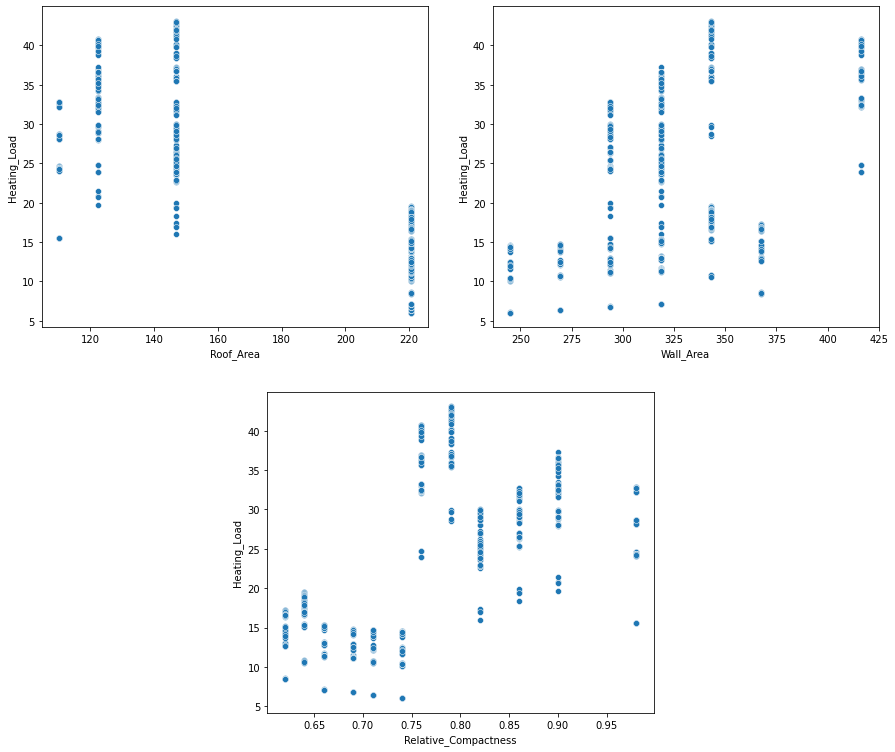

If you cannot see any kind of trend(increasing/decreasing) in the scatter plot, that means the variables are not correlated with each other. 
Hence, it will not be possible to create a model using those two variables


In [ ]:
import matplotlib.gridspec as gridspec
f = plt.figure(figsize=(15,13))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.4)
ax1 = f.add_subplot(gs[0, :2] )
ax2 = f.add_subplot(gs[0, 2:])
ax3 = f.add_subplot(gs[1, 1:3])
sns.scatterplot(ex_df['Roof_Area'], ex_df['Heating_Load'],ax=ax1)
sns.scatterplot(ex_df['Wall_Area'], ex_df['Heating_Load'],ax=ax2)
sns.scatterplot(ex_df['Relative_Compactness'],ex_df['Heating_Load'],ax=ax3)

plt.show();

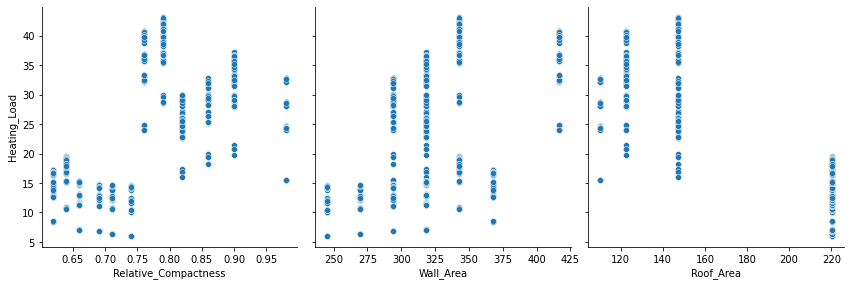

In [ ]:
sns.pairplot(ex_df, x_vars=['Relative_Compactness', 'Wall_Area', 'Roof_Area'], 
             y_vars='Heating_Load', size=4, aspect=1, kind='scatter')
plt.show()

## **Task 3. Obtain Pearson correlation coefficients for “Heat_Load” and each of the three independent variables of interest**

In [ ]:
ex_df[ex_df.columns[:3]].corrwith(ex_df['Heating_Load'])

Relative_Compactness    0.622272
Wall_Area               0.455671
Roof_Area              -0.861828
dtype: float64

In [ ]:
ex_df.corr()[['Heating_Load']]

,Heating_Load
Relative_Compactness,0.622272
Wall_Area,0.455671
Roof_Area,-0.861828
Heating_Load,1.000000


### **Question 6. Discuss the relationships between the dependent variable and each independent variable based on the scatterplots and correlation coefficients obtained. Does each independent variable appear to be correlated with “Heat_Load”? If so, is the correlation positive or negative? Is the correlation linear?**

#### **Answer**

we cannot see any kind of trend(increasing/decreasing) in the scatter plot, that means the variables are not correlated with each other except for Relative_Compactness which has moderate positive correlation. 

## The Following are the answer for Scatter plot.

- The **Heating_Load** and  **Relative_Compactness** has **Moderate Positive corelation**  we has got 0.622 value for pearson correlation.

- The **Heating_Load** and  **Wall_Area** has **low Positive corelation** as we has got 0.455 value for pearson correlation.

- The **Heating_Load** and  **Roof_Area** has **High Negative correlation** as we has got -0.861 value for pearson correlation

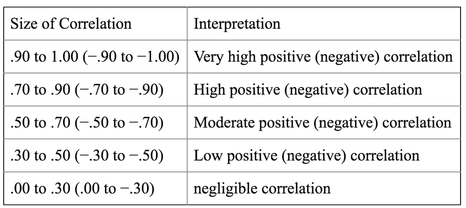

**There is no linear trend**

## **Task 3. Create three separate single linear regression models in which “Heat_Load” is predicted using one of the available predictor variables.**

In [ ]:
#we are not spliting data into train and test set as per given instruction in assignment task 4

# Independent feature or input variables
x = ex_df['Relative_Compactness']
x2= ex_df['Wall_Area']
x3 = ex_df['Roof_Area']

# target variable or dependent variable
y= ex_df['Heating_Load']

# Shape of the train set without adding column
print(x.shape)
print(x2.shape)
print(x3.shape)

# Adding additional column to the train and test data
X_train = x.values.reshape(-1,1)
X2_train = x2.values.reshape(-1,1)
X3_train = x3.values.reshape(-1,1)

print("pepared structure need for sklearn",X_train.shape)
print("pepared structure need for sklearn",X2_train.shape)
print("pepared structure need for sklearn",X3_train.shape)

(768,)
(768,)
(768,)
pepared structure need for sklearn (768, 1)
pepared structure need for sklearn (768, 1)
pepared structure need for sklearn (768, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

def train_model(x,y):

    # Creating an object of Linear Regression
    linear_model = LinearRegression()

    # Fit the model using .fit() method
    model = linear_model.fit(x, y)
    print("Trained ")
    return model

model1 = train_model(X_train,y)  # train for  Relative_Compactness and Heating_Load
model2 = train_model(X2_train,y) # train for Wall_Area and Heating_Load
model3 = train_model(X3_train,y) # train for Roof_Area and Heating_Load

Trained 
Trained 
Trained 


In [ ]:
# Intercept value
print("Intercept of model1 :",model1.intercept_)
print("Intercept of model2 :",model2.intercept_)
print("Intercept of model3 :",model3.intercept_)
# Slope value
print('Slope of model1  :',model1.coef_)
print('Slope of model2 :',model2.coef_)
print('Slope of model3 :',model3.coef_)


Intercept of model1 : -23.052989559381018
Intercept of model2 : -11.259633360745624
Intercept of model3 : 56.30964282289001
Slope of model1  : [59.35902737]
Slope of model2 : [0.10539037]
Slope of model3 : [-0.19253477]


## **Task 4. Calculate or obtain the R-squared and RMSE metrics for each of the three models. Note that you do not need to separate the data into separate training and testing sets in this assignment. So, you can just predict back to the data used to create the models.**

In [95]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rms
# Making Predictions of y_value
y1_train_pred = model1.predict(X_train)
y2_train_pred = model2.predict(X_train)
y3_train_pred = model3.predict(X_train)


# Comparing the r2 value of train  data as we have no test data like we did not split data
print("r2 score of model1",r2_score(y,y1_train_pred))# this model has moderate result but not good becasue this data was 0.62 corrleation with target and below two were nothing
print("r2 score of model2",r2_score(y,y2_train_pred))
print("r2 score of model3",r2_score(y,y3_train_pred))

print("\n\nRMSE score of model1",rms(y,y1_train_pred))
print("RMSE score of model2",rms(y,y2_train_pred))
print("RMSE score of model3",rms(y,y3_train_pred))


r2 score of model1 0.3872226648378837
r2 score of model2 -11.026732719995486
r2 score of model3 -11.275018986339669


RMSE score of model1 62.30688210449811
RMSE score of model2 1222.871954767748
RMSE score of model3 1248.1175737513224


## **Question 7. Compare the model fit using R-squared and RMSE. Do the model results agree with the results obtained using the scatterplots and Pearson correlation coefficients? In other words, did the variable with the highest linear correlation yield the best performing model?**

### **Answere**
## **Comparing R2 score and RMSE score**
- The RMSE value tells us that the average deviation between the predicted **Heating_Load** made by the model and the actual **Relative_Compactness**.

- The R2 value tells us that the predictor variables in the model (**Relative_Compactness**) are able to explain 38.7% of the variation in the **Heating_Load** 
- We can see that the RMSE value for **model2** is greater than the previous **model1**. We can also see that the R2 value for  **model2 and modle3** is less than the previous model1. This tells us that these model fits the data worse than the **previous model1**.

## **Comparing Correlation for predicted value and actual value with independent variables**

In [121]:
pred1 = pd.DataFrame(y1_train_pred, columns=["model1_predic"]) # predicted target values from model 1
pred2 = pd.DataFrame(y2_train_pred, columns=["model2_predic"] ) #predicted target values from model 2
pred3 = pd.DataFrame(y3_train_pred,  columns=["model3_predic"] )# predicted target values from model 3

# correlation for predicted variable with actual input variable

print("modle1 predicted target correlation with  Relative_Compactness ",ex_df[ex_df.columns[0]].corr(pred1['model1_predic']))
print("modle2 predicted target correlation with Wall Area ", ex_df[ex_df.columns[1]].corr(pred2['model2_predic']))
print("modle3 predicted target correlation with Roof Area ",ex_df[ex_df.columns[2]].corr(pred3['model3_predic']))

modle1 predicted target correlation with  Relative_Compactness  1.0
modle2 predicted target correlation with Wall Area  -0.2037816803210471
modle3 predicted target correlation with Roof Area  0.8688234077044722


In [100]:
ex_df[ex_df.columns[:3]].corrwith(ex_df['Heating_Load']) # actuall dataset corelation with target 

Relative_Compactness    0.622272
Wall_Area               0.455671
Roof_Area              -0.861828
dtype: float64

- the above correlation comparsion show that the **y_pred** correlation is not same as before we use with **y_actual** thus models has not best fit line or not good learned.

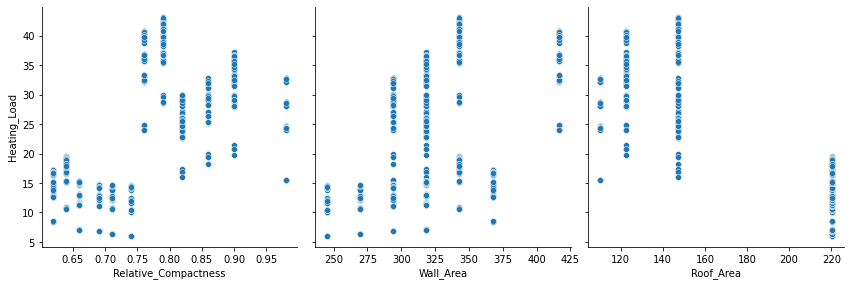

In [108]:
#actual Dataset scatterplot result
sns.pairplot(ex_df, x_vars=['Relative_Compactness', 'Wall_Area', 'Roof_Area'], 
             y_vars='Heating_Load', size=4, aspect=1, kind='scatter')
plt.show()

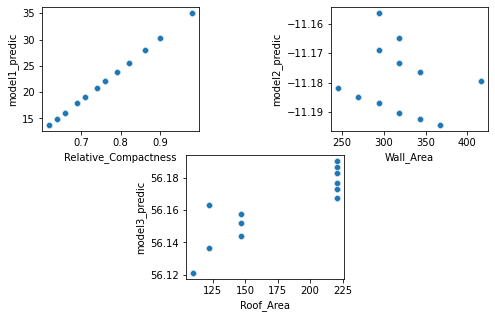

In [116]:
# after prediction scatterplot
f = plt.figure(figsize=(8,5))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=10)
ax1 = f.add_subplot(gs[0, :2] )
ax2 = f.add_subplot(gs[0, 2:])
ax3 = f.add_subplot(gs[1, 1:3])
sns.scatterplot(ex_df['Relative_Compactness'],pred1['model1_predic'],ax=ax1)
sns.scatterplot(ex_df['Wall_Area'],pred2['model2_predic'],ax=ax2)
sns.scatterplot(ex_df['Roof_Area'],pred3['model3_predic'] ,ax=ax3)
plt.show();

- Yes the highest correlation variable in this case performing good as compared to other as we can see in first plot the relation is positive.
- The above other Scatter Plot show total different veiw one is showing negative and other show no trend so we can say that model is not trained well or not set best fit line. because dependent variable was not high correlated with their independent variable. 